# Circuit Decomposition

You may recall from your quantum mechanics course that quantum theory is unitary. The aim of a quantum computer essentially boils down to executing unitaries and as you have seen previously we also explored universality in quantum computing

**"A set of quantum gates is said to be universal if any unitary transformation of the quantum data can be efficiently approximated arbitrarily well as a sequence of gates in the set."** (https://qiskit.org/textbook/ch-algorithms/defining-quantum-circuits.html)

Every gate you run on the IBM Quantum Experience is transpiled into single qubit rotations and CNOT (CX) gates. We know that these constitute a universal gate set, which implies that any unitary can be implemented using only these gates. However, in general it is not easy to find a good decomposition for an arbitrary unitary. Your task is to find such a decomposition for given unitary.

First off let us import the required functions for checking circuit and supplying the unitary.

In [1]:
# Importing standard Qiskit libraries and configuring account
from qiskit import *
from qiskit.compiler import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import matplotlib.pyplot as plotter
import scipy
import numpy as np
from IPython.display import display, Math, Latex
import qiskit.quantum_info as qi
%matplotlib inline
%pip install -I git+https://github.com/mnp-club/MnP_QC_Workshop.git
from mnp_qc_workshop_2020.unitary_circuit import *

  Cloning https://github.com/mnp-club/MnP_QC_Workshop.git to c:\users\mahade~1\appdata\local\temp\pip-req-build-qd0q1380
  Created wheel for mnp-qc-workshop-2020: filename=mnp_qc_workshop_2020-0.1-cp37-none-any.whl size=6924 sha256=536ff96d4124a6834e0e3dd6f290ab8290d0a8448a1ccd91b6b3226ec99dc6f9
  Stored in directory: C:\Users\MAHADE~1\AppData\Local\Temp\pip-ephem-wheel-cache-avewjkr6\wheels\36\2c\cf\a4cccefc10da21f2e37567d1a568955da0f91923b9263c9b4b
Successfully built mnp-qc-workshop-2020
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/mnp-club/MnP_QC_Workshop.git 'C:\Users\MAHADE~1\AppData\Local\Temp\pip-req-build-qd0q1380'


<p>Now you can have a look at the unitary. We are just going to plot some graphs to give an idea of what it looks like.</p>

(16, 16)


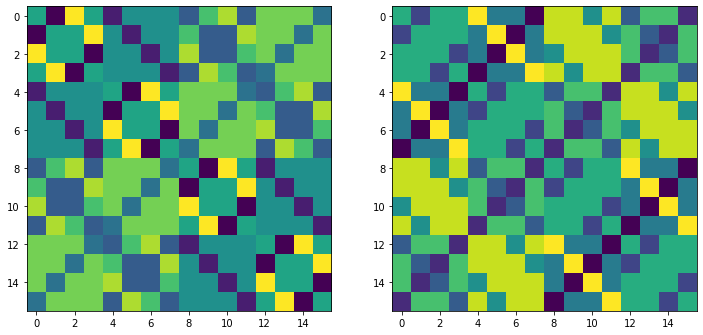

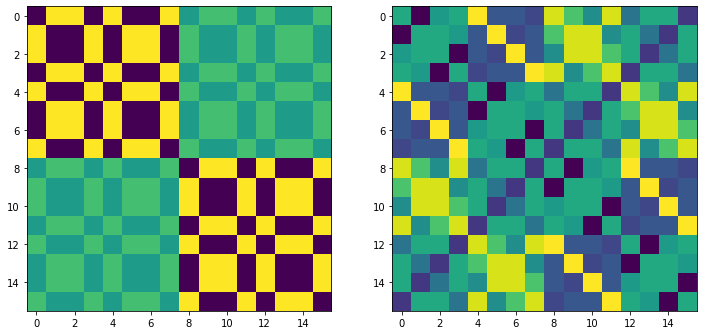

In [2]:
U = get_unitary()
print(U.shape)
fig, (ax1, ax2) = plotter.subplots(nrows = 1, ncols = 2, figsize=(12,6))
ax1.imshow(np.real(U)) #plot real parts of each element
ax2.imshow(np.imag(U)) #plot imaginary parts of each element
fig, (ax3, ax4) = plotter.subplots(nrows = 1, ncols = 2, figsize=(12,6))
ax3.imshow(np.abs(U)) #plot the absolute values of each element
ax4.imshow(np.angle(U)) #plot the phase angles of each element

<p>Although the unitary doesnt look all that pleasant, it is symmetric and also has some interesting properties which it would disclose if you happen to do some modifications to it. You might find it to show some cleaner shape if you happen to multiply certain things to it.</p>

## Your task

**Using only single qubit rotations and CNOT gates, find a quantum circuit that approximates that unitary $U$ by a unitary $V$ up to an error $\varepsilon = 0.01$, such that $\lVert U - V\rVert_2 \leq \varepsilon$ !** 

Note that the norm we are using here is the spectral norm, $\qquad \lVert A \rVert_2 = \max_{\lVert \psi \rVert_2= 1} \lVert A \psi \rVert$.

This can be seen as the largest scaling factor that the matrix $A$ has on any initial (normalized) state $\psi$. One can show that this norm corresponds to the largest singular value of $A$, i.e., the square root of the largest eigenvalue of the matrix $A^\dagger A$, where $A^{\dagger}$ denotes the conjugate transpose of $A$.

**When you submit a circuit, we remove the global phase of the corresponding unitary $V$ before comparing it with $U$ using the spectral norm. For example, if you submit a circuit that generates $V = \text{e}^{i\theta}U$, we remove the global phase $\text{e}^{i\theta}$ from $V$ before computing the norm, and you will have a successful submission. As a result, you do not have to worry about matching the desired unitary, $U$, up to a global phase.**

The cost function that we have defined is something like this
$$
\qquad \text{cost} = 10 \cdot n_{cx} + n_{u3}
$$

**Note that you will need to ensure that your circuit is composed only of $u3$ and $cx$ gates. The exercise is considered correctly solved if your cost is smaller than 1200.**

In the cell below you can go ahead and try to execute this in a circuit. Note that we have added a transpile function in the cell below since we are going to calculate the cost after your circuit has been transpiled into only CNOT gates and U3 gates. You can find the documentation for the transpile function <a href = "https://qiskit.org/documentation/stubs/qiskit.compiler.transpile.html">here</a>.

Another function that might come in handy for starting with is the <code>QuantumCircuit.unitary(obj, qubits[, label])</code> which simply applies the unitary gate <code>obj</code> to the given <code>qubits</code>.

### Try 1: just apply unitary and transpile
The transpile function breaks down the unitary by an algorithm for decomposing. The logic it uses for decomposing is quite like the two level unitary approach so this makes the raw work required to be nothing.

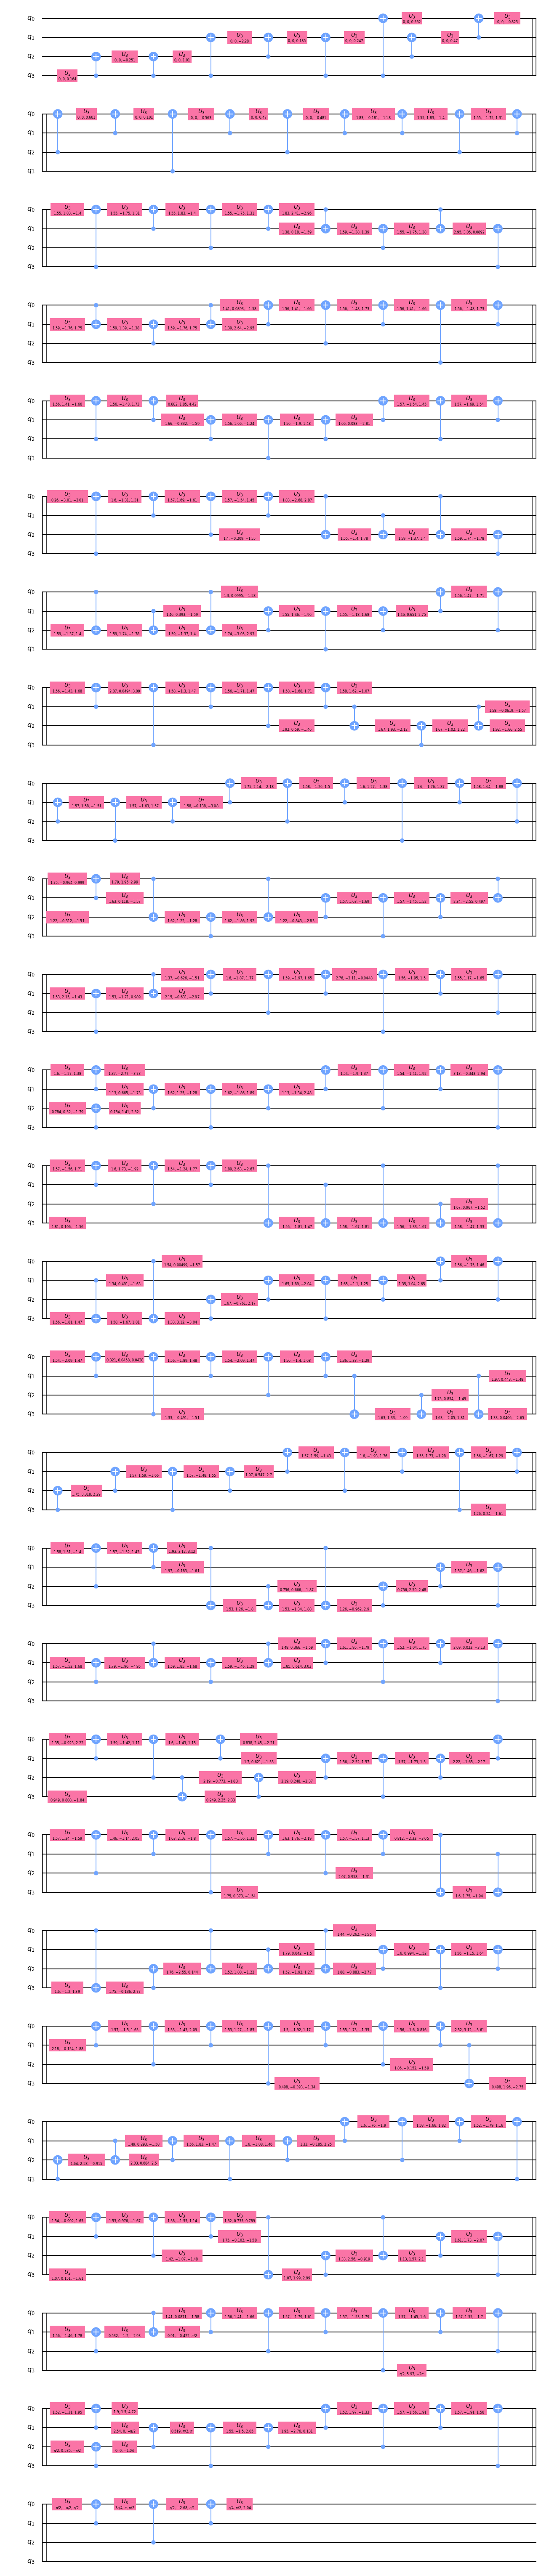

In [3]:
qc1 = QuantumCircuit(4)
qc1.unitary(U,range(4))
qc1 = transpile(qc1,basis_gates=['cx','u3'],optimization_level=3)
qc1.draw('mpl')

In [4]:
#Run this cell for getting your circuit checked
check_circuit(qc1)

||U - V||^2 = 6.845862927230344e-14
Cost of your circuit is 2440
Unfortunately, it looks like the circuit you have made is a tad bit costlier than it should have been. Try again!


Clearly this approach is not going to get us the right answer easily since 2440 is far more than 1200 for cost. Now we have some options, we can either multiply some $V$ to $U$ such that $VU$ decomposes very easily and so does $V^{\dagger}$ so we will trick the transpile function into doing better than it actually can.

### Try 2: decomposing of $HU$
Here H is the hadamard over all the qubits and it might just work but first lets take a look at what $HU$ actually looks like

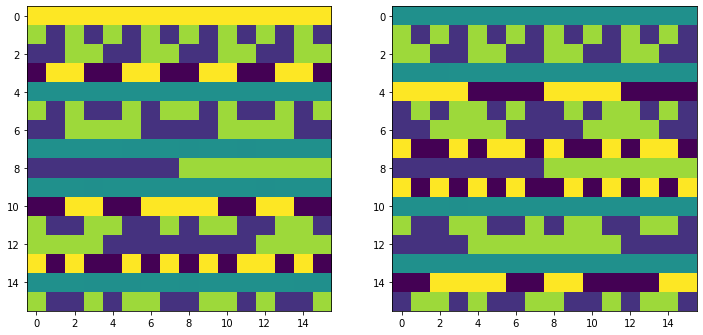

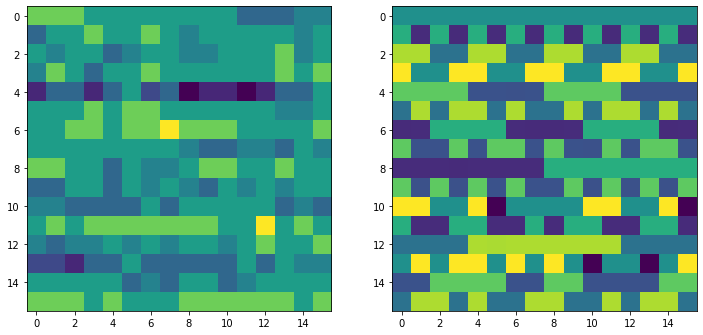

In [5]:
H = scipy.linalg.hadamard(16)/4 #Normalizing has to be done
HU = np.matmul(H,U)
fig, (ax1, ax2) = plotter.subplots(nrows = 1, ncols = 2, figsize=(12,6))
ax1.imshow(np.real(HU)) #plot real parts of each element
ax2.imshow(np.imag(HU)) #plot imaginary parts of each element
fig, (ax3, ax4) = plotter.subplots(nrows = 1, ncols = 2, figsize=(12,6))
ax3.imshow(np.abs(HU)) #plot the absolute values of each element
ax4.imshow(np.angle(HU)) #plot the phase angles of each element

This too doesn't look all that promising but there is symmetry and some rows are also constant so we can apply the $HU$ decomposition and then after that apply $H$ gates to all the qubits making it $H^2U$ which is $U$ after all.

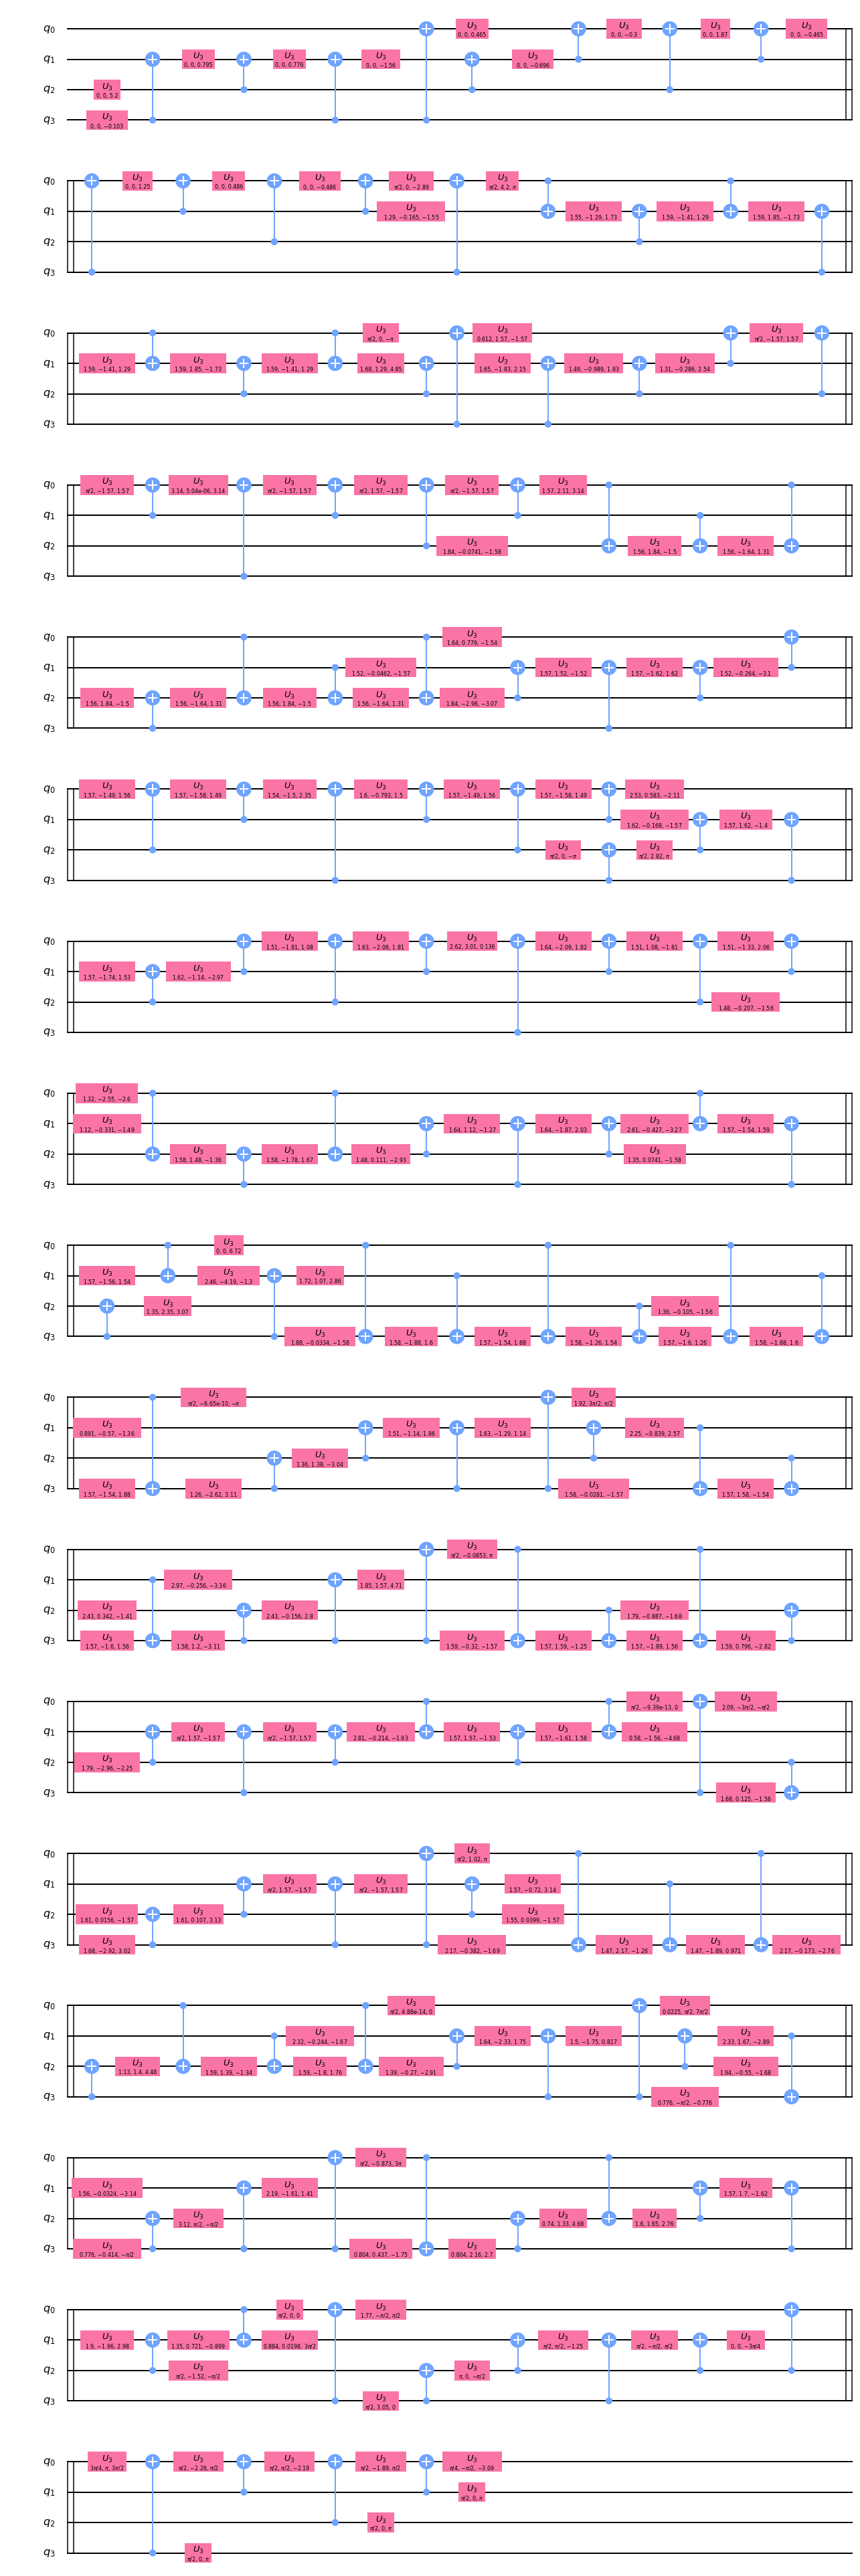

In [6]:
qc2 = QuantumCircuit(4)
#for i in range(4):
 #   qc2.h(i)
qc2.unitary(HU,range(4))
for i in range(4):
    qc2.h(i)
qc2 = transpile(qc2,basis_gates=['cx','u3'],optimization_level=3)
qc2.draw('mpl')

In [7]:
#Run this cell for getting your circuit checked
check_circuit(qc2)

||U - V||^2 = 1.3209622847335462e-05
Cost of your circuit is 1546
Unfortunately, it looks like the circuit you have made is a tad bit costlier than it should have been. Try again!


We are still not quite there but there is an improvement nonetheless

### Try 3: a change of basis
Now what if we try decomposing the $HUH$ gate by applying change of basis and then changing it back. Lets first take a look at $HUH$

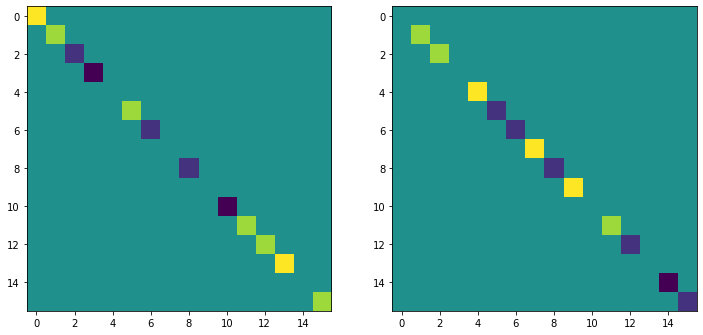

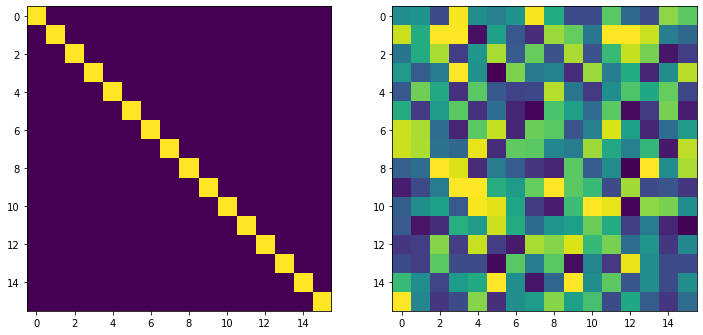

In [8]:
HUH = np.matmul(HU,H)
fig, (ax1, ax2) = plotter.subplots(nrows = 1, ncols = 2, figsize=(12,6))
ax1.imshow(np.real(HUH)) #plot real parts of each element
ax2.imshow(np.imag(HUH)) #plot imaginary parts of each element
fig, (ax3, ax4) = plotter.subplots(nrows = 1, ncols = 2, figsize=(12,6))
ax3.imshow(np.abs(HUH)) #plot the absolute values of each element
ax4.imshow(np.angle(HUH)) #plot the phase angles of each element

Now this seems to be very clean innit? This is a diagonal matrix clearly and the transpile function can handle a diagonal function pretty easily compared to the monster from before so let us give it a try shall we.

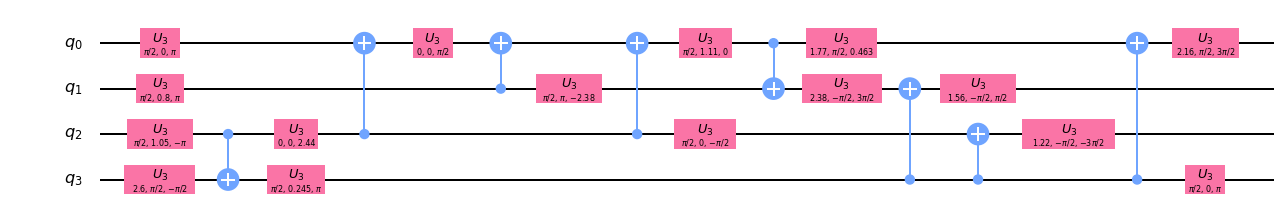

In [9]:
qc3 = QuantumCircuit(4)
for i in range(4):
    qc3.h(i)
qc3.unitary(HUH,range(4))
for i in range(4):
    qc3.h(i)
qc3 = transpile(qc3,basis_gates=['cx','u3'],optimization_level=3)
qc3.draw('mpl')

In [10]:
#Run this cell for getting your circuit checked
check_circuit(qc3)

||U - V||^2 = 1.613633626513074e-14
Cost of your circuit is 96
Good news! Your circuit satisfies the bounds and seems right :) , you may go ahead and submit this notebook or you can also try to lower the cost even more.


This actually worked :) but we can improve far more. If you look closely at this matrix by just printing out the diagonal values you will see this

In [11]:
diag = np.diag(HUH)
print(diag)

[ 1.00000000e+00+1.18828558e-16j  7.07106781e-01+7.07106781e-01j
 -7.07106781e-01+7.07106781e-01j -1.00000000e+00+1.27935856e-16j
 -1.04083409e-17+1.00000000e+00j  7.07106781e-01-7.07106781e-01j
 -7.07106781e-01-7.07106781e-01j -7.76288755e-17+1.00000000e+00j
 -7.07106781e-01-7.07106781e-01j  2.90566182e-17+1.00000000e+00j
 -1.00000000e+00+3.20923843e-17j  7.07106781e-01+7.07106781e-01j
  7.07106781e-01-7.07106781e-01j  1.00000000e+00-4.38017678e-17j
  1.50920942e-16-1.00000000e+00j  7.07106781e-01-7.07106781e-01j]


Due to floating point errors there are errors in the order of 1e-15+ but they dont really matter anyway so from this we can actually see that all of these terms are in form of some $e^{\iota r\pi/4}$ and we now define this cleanly

In [12]:
a = np.sqrt(0.5)
clean_diag = [ 1, a+(a*1j), -a+(a*1j), -1, 1j, a-(a*1j), -a-(a*1j), 1j, 
                       -a-(a*1j), 1j, -1, a+(a*1j), a-(a*1j), 1, -1j, a-(a*1j)]
print(clean_diag)

[1, (0.7071067811865476+0.7071067811865476j), (-0.7071067811865476+0.7071067811865476j), -1, 1j, (0.7071067811865476-0.7071067811865476j), (-0.7071067811865476-0.7071067811865476j), 1j, (-0.7071067811865476-0.7071067811865476j), 1j, -1, (0.7071067811865476+0.7071067811865476j), (0.7071067811865476-0.7071067811865476j), 1, (-0-1j), (0.7071067811865476-0.7071067811865476j)]


Now this looks quite a lot more cleaner. There is a function for appending diagonal matrices to the circuit with syntax <code>QuantumCircuit.diagonal(diag,qubits)<code>

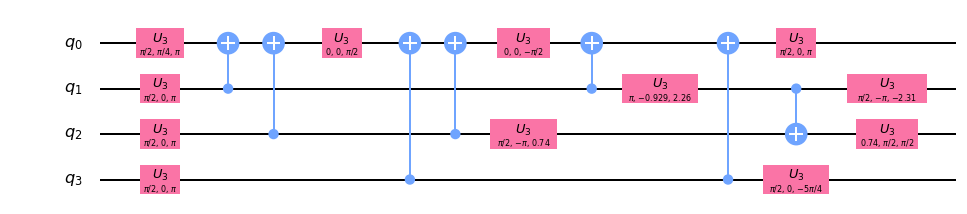

In [13]:
qc31 = QuantumCircuit(4)
for i in range(4):
    qc31.h(i)
qc31.diagonal(clean_diag,qc31.qubits)
for i in range(4):
    qc31.h(i)
qc31 = transpile(qc31,basis_gates=['cx','u3'],optimization_level=3)
qc31.draw('mpl')

In [14]:
#Run this cell for getting your circuit checked
check_circuit(qc31)

||U - V||^2 = 3.5107177571652686e-15
Cost of your circuit is 82
Good news! Your circuit satisfies the bounds and seems right :) , you may go ahead and submit this notebook or you can also try to lower the cost even more.


So we have achieved a sub 90 cost and that is surely a good sign but the given diagonal can actually be manually decomposed with a little thought.

### Try 4: a little manual calculations
We know that $R_z(\theta) = \begin{bmatrix}1 & 0\\0 & e^{\iota\theta}\end{bmatrix}$ if we take $e^{\iota\theta/2}$ as global phase. Our diagonal matrix looks quite like something which could have been made using certain $R_z$ gates at all the qubits followed by some cz gates so we will try this very approach. In all the preceding equations we will be following qiskit's notation for order of qubits.

Say we take $R_z(a_1\pi/4) \otimes R_z(a_2\pi/4) \otimes R_z(a_3\pi/4) \otimes R_z(a_4\pi/4)$ this happens to be a diagonal matrix where each term happens to be of some form $e^{ir\pi/4}$ so we might actually be able to get some sense of the diagonal matrix with this and every CZ gate with control as some $i$ and target as some $j$ just makes any term where $ij = |11\rangle$ get a -1 phase.

For now we will shoot in values to see what would match our actual diagonal. We will let the terms be differing by a phase of -1 so then we can look into applying the cz gates since its quite obvious that we would be needing them otherwise this whole unitary would just be Rx operations on seperate qubits and would decompose pretty simply.

In [15]:
func = lambda a: np.array([[1,0],[0,np.exp(1j*np.pi*a/4)]])

def checking_of_diag(diag_v):
    for i in range(16):
        if np.abs(diag_v[i]-clean_diag[i])>=0.001 and np.abs(diag_v[i]+clean_diag[i])>=0.001:
            return False
    return True
            

while(True):
    par = np.random.randint(low=1,high=8, size=4)#We will assume that all atleast rotate by pi/4
    V_test = np.kron(np.kron(func(par[0]),func(par[1])),np.kron(func(par[2]),func(par[3])))
    if checking_of_diag(np.diag(V_test)):
        print(par)
        break
    

[5 2 3 1]


In [16]:
differences = np.identity(16)
for i in range(16):
    if np.abs(V_test[i,i]-clean_diag[i]) >= 0.0001:
        print(i)
        differences[i,i] = -1

5
7
9
10
14
15


In [17]:
def without_global_phase(matrix: np.ndarray, atol: float = 1e-8) :
    phases1 = np.angle(matrix[abs(matrix) > atol].ravel(order='F'))
    if len(phases1) > 0:
        matrix = np.exp(-1j * phases1[0]) * matrix
    return matrix
#Function just returns norm ignoring global phase between unitaries
def norm(unitary_a: np.ndarray, unitary_b: np.ndarray) :
    return np.linalg.norm(without_global_phase(unitary_b)-without_global_phase(unitary_a), ord=2)



qc_d = QuantumCircuit(4)
for i in range(64):
    if (i%2) == 1:
        qc_d.cz(0,1)
    if (i//2)%2 == 1:
        qc_d.cz(0,2)
    if (i//4)%2 == 1:
        qc_d.cz(0,3)
    if (i//8)%2 == 1:
        qc_d.cz(1,2)
    if (i//16)%2 == 1:
        qc_d.cz(1,3)
    if (i//32)%2 == 1:
        qc_d.cz(3,2)
    if norm(qi.Operator(qc_d).data,differences) <= 0.001:
        print(i)
        break
    qc_d = QuantumCircuit(4)

22


So as we can see for the parameters of <code>[5 2 3 1]</code> the terms for 0101, 0111, 1001, 1010, 1110, 1111 have to get their terms flipped. We can run the cell above to see if such a combination has workning cz gates since it iterates over all the 64 possibilities of application of cz gates for 4 qubits. Running this cell shows that qc.cz(0,2), qc.cz(0,3) and qc.cz(1,3) actually does our job so we will now try this out.

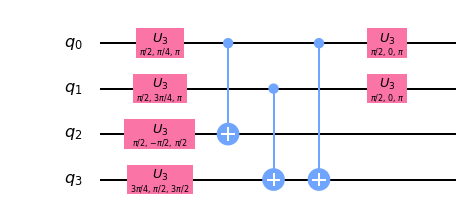

In [18]:
qc = QuantumCircuit(4)
theta1 = par[3]*np.pi/4
theta2 = par[2]*np.pi/4
theta3 = par[1]*np.pi/4
theta4 = par[0]*np.pi/4
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc.rz(theta1,0)
qc.rz(theta2,1)
qc.rz(theta3,2)
qc.rz(theta4,3)
qc.cz(1,3)
qc.cz(0,2)
qc.cz(0,3)
qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)
qc = transpile(qc,basis_gates=['cx','u3'],optimization_level=3)
qc.draw('mpl')

In [19]:
#Run this cell for getting your circuit checked
check_circuit(qc)

||U - V||^2 = 1.2464819284275041e-15
Cost of your circuit is 36
Good news! Your circuit satisfies the bounds and seems right :) , you may go ahead and submit this notebook or you can also try to lower the cost even more.


A few points to be made in this approach, you might have just as well done this part fully manually but the cell where we try out the $R_z(\theta)$ rotations will always give output of a form of [$a_1$,$a_2$,$a_3$,$a_4$] and $a_1$ = 1 mod 4, $a_2$ = 2 mod 4, $a_3$ = 3 mod 4, $a_4$ = 1 mod 4. These need not have an actual working cz combination so the cell after that where we do hit and trial of the cz gates to be applied need not actually give an output in which case we just have to try again. We could have put all that code in one while loop but for better readability I have kept them seperated here.

And there you have it, the smallest circuit we have found for this unitary. If you happen to find an even smaller please do send it to us with an explanation. 


**Thank you for attending this workshop and we sure do hope you had fun and learnt something new :)**